# Using machine learning

When using machine learning, we will usually rely on off-the-shelf implementations such as in [scikit-learn](https://scikit-learn.org/). To install this, do `pip install sklearn`.

In [93]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import pandas as pd

In [11]:
iris = pd.read_csv('data/iris.data', header=None, 
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Text(0.5, 1.0, 'Sepal length vs width')

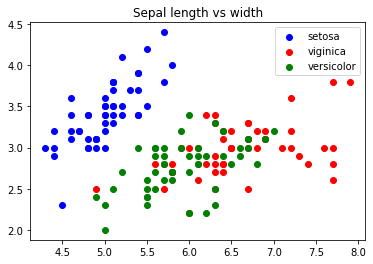

In [8]:
# Idea: when we look at the ground truth, these look easily classifiable by simple algorithms

# But now, separate by class
setosa = iris[iris['class'] == 'Iris-setosa']
virginica = iris[iris['class'] == 'Iris-virginica']
versicolor = iris[iris['class'] == 'Iris-versicolor']

plt.scatter(x=setosa['sepal_length'], y=setosa['sepal_width'], color='b')
plt.scatter(x=virginica['sepal_length'], y=virginica['sepal_width'], color='r')
plt.scatter(x=versicolor['sepal_length'], y=versicolor['sepal_width'], color='g')
plt.legend(['setosa', 'viginica', 'versicolor'])
plt.title("Sepal length vs width")

In [35]:
# Construct a classifier object
# Then will need to be trained, or "fit"
knn = KNeighborsClassifier(n_neighbors = 3)

# To do that, need to pass an array of data points
# and an array of labels for each of those points

# Extract the two columns we want to classify on as a numpy array
X = iris[['sepal_length','sepal_width']].values

Y = iris['class'].values

# We have the labels as strings, just map to numbers
# We will set setosa to be class 0
# We will set the non-setosa to class 1

# Replace Iris-setosa entries with 0
Y[Y == 'Iris-setosa'] = 0
Y[Y != 0] = 1

# Because Y started as strings, they were stoerd as a generic object
# so we will convert them to be stored as floats
Y = Y.astype('float64')

# Fit/train the model/algorithm/classifier to the data and labels
knn.fit(X,Y)

# We can now ask the knn to classify new points!
# They call this "predict"
# The .predict() method needs an input matrix of the same cols as X
# It will return an array of predicted labels, one for each row
knn.predict([ [7,2.5], [5,2.7], [5,2.9] ])

array([1., 1., 0.])

In [36]:
# See how confused this algorithm is:
knn.predict(X)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [37]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [42]:
num_wrong = np.sum(np.not_equal(knn.predict(X),Y))
print(f'We got {num_wrong} wrong!')

We got 1 wrong!


## We also usually want to see a decision boundary or regions of each class

One way, use contour plotting to just classify the whole grid.
The easiest way to do this is use `pyplot.contourf` to fill in the areas between grid points,
using `numpy.meshgrid` to generate the grid points themselves.

In [86]:
def f(x,y):
    return 2*x + 1*y

def g(x,y):
    return 1*(x-4)**3 + 3*(y-4)**2

In [49]:
# To make sure the grid contains all of our data
rmin = np.min(X) - 1
rmax = np.max(X) + 1

In [54]:
# in each of these, the i,j element stores the x or y value respectively corresponding to coordinates (i,j)
xs, ys = np.meshgrid(np.arange(rmin,rmax,0.1),np.arange(rmin,rmax,0.1))

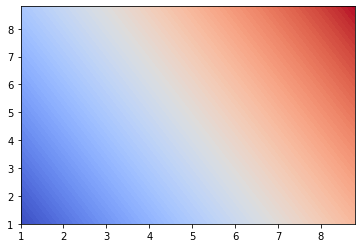

In [88]:
zs = [ [ f( xs[i,j], ys[i,j] ) for j in range(len(ys)) ] for i in range(len(xs)) ]
plt.contourf(xs, ys, zs, levels=100, cmap='coolwarm')

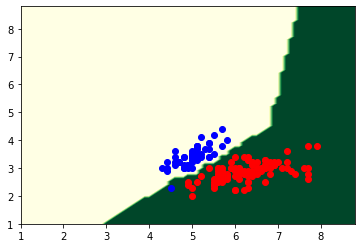

In [96]:
def predict(x,y,clf):
    return clf.predict([[x,y]])[0] # extract the single label

zs = [ [ predict( xs[i,j], ys[i,j], knn ) for j in range(len(ys)) ] for i in range(len(xs)) ]
plt.contourf(xs, ys, zs, levels=100, cmap='YlGn')
plt.scatter(X[Y==0,0], X[Y==0,1], c='b')
plt.scatter(X[Y==1,0], X[Y==1,1], c='r')

## Now try with a support vector machine (SVM)

In [113]:
clf = SVC(kernel='poly', degree=1)
clf.fit(X,Y)

# We can now ask the knn to classify new points!
# They call this "predict"
# The .predict() method needs an input matrix of the same cols as X
# It will return an array of predicted labels, one for each row
clf.predict([ [7,2.5], [5,2.7], [5,2.9] ])

array([1., 1., 0.])

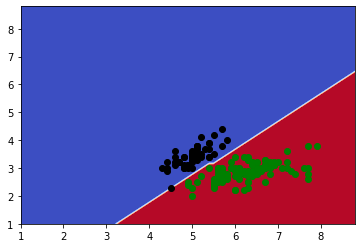

In [114]:
zs = [ [ predict( xs[i,j], ys[i,j], clf ) for j in range(len(ys)) ] for i in range(len(xs)) ]

plt.contourf(xs, ys, zs, levels=100, cmap='coolwarm')
plt.scatter(X[Y==0,0], X[Y==0,1], c='k')
plt.scatter(X[Y==1,0], X[Y==1,1], c='g')